### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [79]:
data = pd.read_csv('data/coupons.csv')

In [80]:
data.head()
data.info

<bound method DataFrame.info of            destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  

2. Investigate the dataset for missing or problematic data.

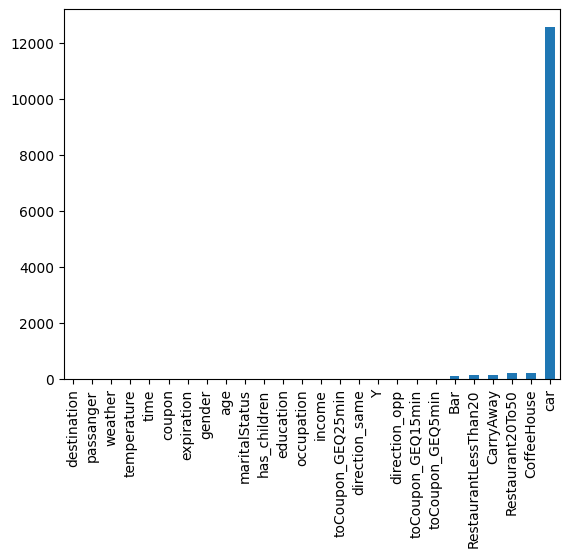

In [27]:
### BEGIN SOLUTION
# Calculate and sort the count of missing values in each column
missing_values_count = data.isnull().sum().sort_values()
# Visualize the missing values count using a bar plot
missing_values_count.plot(kind='bar')
# Save the plot to a file
plt.savefig('visualizations/missing_plot_.png')
# Display the plot
plt.show()
### END SOLUTION|


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Drop the 'car' column from the DataFrame to exclude it from analysis
data = data.drop('car', axis=1)

4. What proportion of the total observations chose to accept the coupon?



In [31]:
# Calculate the total number of accepted responses (1 denotes acceptance)
accepted_count = data['Y'].sum()

# Get the total number of data points
total_count = len(data)

# Calculate the acceptance rate by dividing accepted responses by total data points
acceptance_rate = accepted_count / total_count

# Print the acceptance rate as a percentage, rounded to two decimal places
print(f"Acceptance Rate: {acceptance_rate:.2%}")

Acceptance Rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

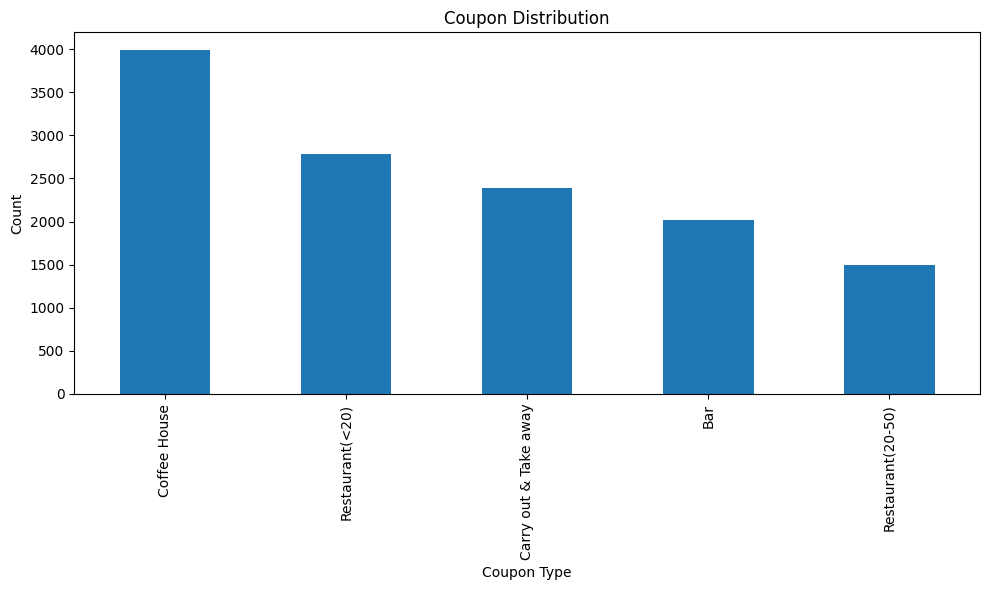

In [33]:
# Count the occurrence of each unique value in the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Create a new figure with specified dimensions for the bar plot
plt.figure(figsize=(10,6))

# Generate a bar plot from the coupon counts
coupon_counts.plot(kind='bar')

# Set the title of the plot
plt.title('Coupon Distribution')

# Label the x-axis
plt.xlabel('Coupon Type')

# Label the y-axis
plt.ylabel('Count')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Ensure labels fit within the plot area
plt.tight_layout()

# Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

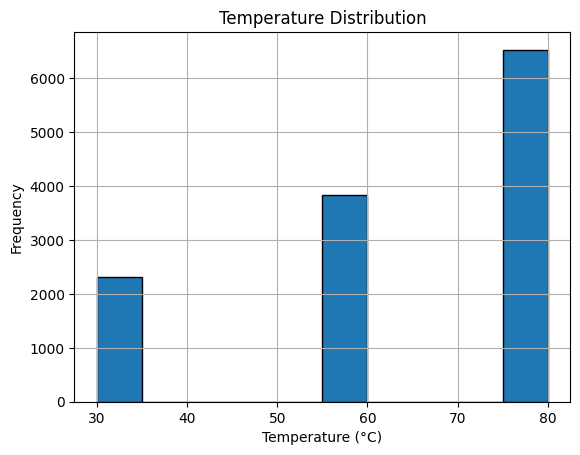

In [34]:
# Create a histogram of the temperature column
data['temperature'].hist(bins=10, edgecolor='black')

# Add title and labels
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

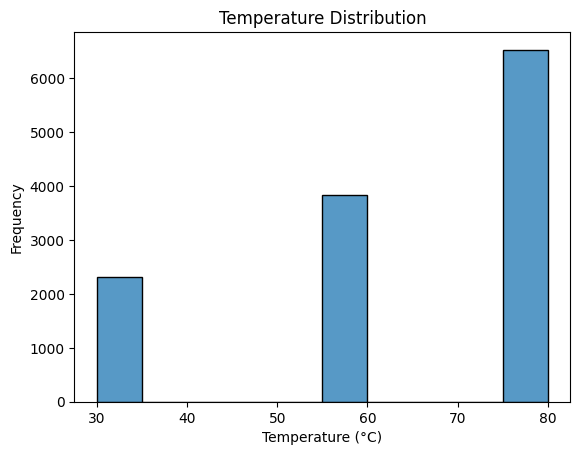

In [42]:
# Create a histogram of the temperature column
sns.histplot(data['temperature'], bins=10, edgecolor='black', kde=False)

# Add title and labels
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

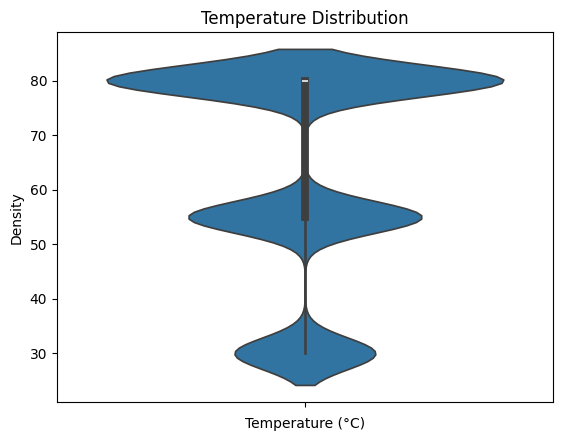

In [43]:
# Create a violin plot of the temperature column
sns.violinplot(data['temperature'])

# Add title and labels
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [44]:
bar_coupons_data = data[['Bar']]

print(bar_coupons_data)

         Bar
0      never
1      never
2      never
3      never
4      never
...      ...
12679  never
12680  never
12681  never
12682  never
12683  never

[12684 rows x 1 columns]


2. What proportion of bar coupons were accepted?


In [86]:
# Count the number of accepted and total Bar Coupons
accepted_coupons = data[(data['coupon'].isin(['Bar'])) & (data['Y'] == 1)].shape[0]
total_coupons = data['Y'].count()

# Calculate the proportion of accepted coupons
proportion_accepted = accepted_coupons / total_coupons

print(proportion_accepted)

0.065200252286345


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [57]:
# Group 1: Bar <1~3 times (including less than 1) and Y=1
group1_accepted = data[(data['Bar'].isin(['1~3', 'less1'])) & (data['Y'] == 1)].shape[0]
group1_total = len(data)
group1_proportion = group1_accepted / group1_total

# Group 2: Bar >4~8 times (including greater than 8) and Y=1
group2_accepted = data[(data['Bar'].isin(['4~8', 'gt8'])) & (data['Y'] == 1)].shape[0]
group2_total = len(data)
group2_proportion = group2_accepted / group2_total

# Print results
print(f"Group 1 (<3 times) acceptance rate: {group1_proportion*100}%")
print(f"Group 2 (>4 times) acceptance rate: {group2_proportion*100}%")

Group 1 (<3 times) acceptance rate: 27.601702932828758%
Group 2 (>4 times) acceptance rate: 6.993062125512457%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
# Group 1: Bar > 1 times and age > 25
# ------------------------------------------
# Filter data for drivers who go to bar more than once a month and are over the age of 25
group1_accepted = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8']))  # Bar visits > 1 time
    & (data['age'].isin(['26', '31', '36', '41', '46', '50plus']))  # Age > 25
    & (data['Y'] == 1)  # Accepted coupons
].shape[0]

# Print number of accepted coupons 
print("Group 1 accepted =", group1_accepted)

# Total number of data
group1_total = len(data)
print("Total data points =", group1_total)

# Calculate acceptance proportion for this group
group1_proportion = group1_accepted / group1_total

# Print results
print(f"Acceptance rate of people going to Bar > 1 times and whose age is > 25: {group1_proportion*100}%")

Group 1 accepted = 1726
Total data points = 12684
Acceptance rate of people going to Bar > 1 times and whose age is > 25: 13.60769473352255%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [68]:
# Group 1: Bar > 1 times and age > 25
# ------------------------------------------
# Filter data for Group 1 conditions
group1_accepted = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8']))  # Bar visits > 1 time
    & (~data['passanger'].isin(['Kid(s)']))  # Passangers who are not kids
    & (~data['occupation'].isin(['farming', 'fishing','forestry']))  # occupation other than farming, fishing, or forestry
    & (data['Y'] == 1)  # Accepted coupons
].shape[0]

# Print number of accepted coupons for Group 1
print("Group 1 accepted =", group1_accepted)

# Total number of data points
group1_total = len(data)
print("Total data points =", group1_total)

# Calculate acceptance proportion for Group 1
group1_proportion = group1_accepted / group1_total

# Print results
print(f"Acceptance rate of people going to Bar > 1 times and who are not kids and occupation other than farming, fishing, or forestry : {group1_proportion*100}%")

Group 1 accepted = 2303
Total data points = 12684
Acceptance rate of people going to Bar > 1 times and who are not kids and occupation other than farming, fishing, or forestry : 18.15673289183223%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [76]:
# Condition 1: Go to bars > 1 time, passengers not kids, not widowed
# Total number of data points
group1_total = len(data)

condition1 = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8']))  # Bar visits > 1 time
    & (~data['passanger'].isin(['Kid(s)']))  # Passengers not kids
    & (~data['maritalStatus'].isin(['widowed']))  # Not widowed
    & (data['Y'] == 1)  # Accepted coupons
].shape[0]

# Calculate acceptance proportion for condition1
condition1_proportion = condition1 / group1_total

print(f"go to bars more than once a month, had passengers that were not a kid, and were not widowed : {condition1_proportion*100}%")

# Condition 2: Go to bars > 1 time, under 30
condition2 = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8']))  # Bar visits > 1 time
    & (data['age'].isin(['26'])) 
    & (data['Y'] == 1)  # Accepted coupons
].shape[0]

# Calculate acceptance proportion for condition2
condition2_proportion = condition2 / group1_total

print(f"go to bars more than once a month and are under the age of 30 : {condition2_proportion*100}%")

# Condition 3: Frequent cheap restaurant visits, moderate income
restaurant_freq = ['4~8', 'gt8']
moderate_income = ['$12500-$24999', '$25000-$37499', '$37500-$49999']
low_income = ['Less than $12500']

condition3 = (
    data['RestaurantLessThan20'].isin(restaurant_freq)  # Frequent cheap restaurant visits
    & data['income'].isin(moderate_income + low_income)  # Moderate or low income
    & (data['Y'] == 1)  # Accepted coupons
).shape[0]

# Calculate acceptance proportion for condition2
condition3_proportion = condition3 / group1_total

print(f"go to cheap restaurants more than 4 times a month and income is less than 50K : {condition3_proportion*100}%")



go to bars more than once a month, had passengers that were not a kid, and were not widowed : 18.15673289183223%
go to bars more than once a month and are under the age of 30 : 5.739514348785872%
go to cheap restaurants more than 4 times a month and income is less than 50K : 100.0%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Demographics
Age: Drivers who accepted bar coupons are likely young adults, predominantly under 30 years old (5.74%).
Marital Status: They are unlikely to be widowed.
Income: Most drivers who accepted bar coupons have an annual income below $50,000.

Behavior
Socializing: Drivers who accepted bar coupons frequently socialize, visiting bars more than once a month (18.16%).
Dining Habits: They often dine at cheap restaurants, visiting more than four times a month (100%).
Passengers: Drivers who accepted bar coupons typically have passengers, but not usually children.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [83]:
coffee_house_coupons_data = data[['CoffeeHouse']]

print(coffee_house_coupons_data)

      CoffeeHouse
0           never
1           never
2           never
3           never
4           never
...           ...
12679       never
12680       never
12681       never
12682       never
12683       never

[12684 rows x 1 columns]


In [ ]:
# Count the number of accepted and total Coffee House Coupons
accepted_coupons = data[(data['coupon'].isin(['Coffee House'])) & (data['Y'] == 1)].shape[0]
total_coupons = data['Y'].count()

# Calculate the proportion of accepted coupons
proportion_accepted = accepted_coupons / total_coupons

print(proportion_accepted)

0.15728476821192053


In [ ]:
# Group 1: Coffe house <1~3 times (including less than 1) and Y=1
group1_accepted = data[(data['CoffeeHouse'].isin(['1~3', 'less1'])) & (data['Y'] == 1)].shape[0]
group1_total = len(data)
group1_proportion = group1_accepted / group1_total

# Group 2: Coffee House >4~8 times (including greater than 8) and Y=1
group2_accepted = data[(data['CoffeeHouse'].isin(['4~8', 'gt8'])) & (data['Y'] == 1)].shape[0]
group2_total = len(data)
group2_proportion = group2_accepted / group2_total

# Print results
print(f"Group 1 (<3 times) acceptance rate: {group1_proportion*100}%")
print(f"Group 2 (>4 times) acceptance rate: {group2_proportion*100}%")

Group 1 (<3 times) acceptance rate: 31.22043519394513%
Group 2 (>4 times) acceptance rate: 14.01766004415011%


In [ ]:
# Group 1: Coffe House > 1 times and age > 25
# ------------------------------------------
# Filter data for drivers who go to Coffee House more than once a month and are over the age of 25
group1_accepted = data[
    (data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8']))  # Coffee House visits > 1 time
    & (data['age'].isin(['26', '31', '36', '41', '46', '50plus']))  # Age > 25
    & (data['Y'] == 1)  # Accepted coupons
].shape[0]

# Print number of accepted coupons 
print("Group 1 accepted =", group1_accepted)

# Total number of data
group1_total = len(data)
print("Total data points =", group1_total)

# Calculate acceptance proportion for this group
group1_proportion = group1_accepted / group1_total

# Print results
print(f"Acceptance rate of people going to Coffee House > 1 times and whose age is > 25: {group1_proportion*100}%")

Group 1 accepted = 2718
Total data points = 12684
Acceptance rate of people going to Coffee House > 1 times and whose age is > 25: 21.428571428571427%


In [90]:
# Condition 1: Go to Coffe House > 1 time, passengers not kids, not widowed
# Total number of data points
group1_total = len(data)

condition1 = data[
    (data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8']))  # Coffee House visits > 1 time
    & (~data['passanger'].isin(['Kid(s)']))  # Passengers not kids
    & (~data['maritalStatus'].isin(['widowed']))  # Not widowed
    & (data['Y'] == 1)  # Accepted coupons
].shape[0]

# Calculate acceptance proportion for condition1
condition1_proportion = condition1 / group1_total

print(f"go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed : {condition1_proportion*100}%")

# Condition 2: Go to bars > 1 time, under 30
condition2 = data[
    (data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8']))  # Coffee House visits > 1 time
    & (data['age'].isin(['26'])) 
    & (data['Y'] == 1)  # Accepted coupons
].shape[0]

# Calculate acceptance proportion for condition2
condition2_proportion = condition2 / group1_total

print(f"go to Coffee House more than once a month and are under the age of 30 : {condition2_proportion*100}%")

# Condition 3: Frequent cheap restaurant visits, moderate income
restaurant_freq = ['4~8', 'gt8']
moderate_income = ['$12500-$24999', '$25000-$37499', '$37500-$49999']
low_income = ['Less than $12500']

condition3 = (
    data['RestaurantLessThan20'].isin(restaurant_freq)  # Frequent cheap restaurant visits
    & data['income'].isin(moderate_income + low_income)  # Moderate or low income
    & (data['Y'] == 1)  # Accepted coupons
).shape[0]

# Calculate acceptance proportion for condition2
condition3_proportion = condition3 / group1_total

print(f"go to cheap restaurants more than 4 times a month and income is less than 50K : {condition3_proportion*100}%")



go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed : 28.334910122989594%
go to Coffee House more than once a month and are under the age of 30 : 6.606748659728792%
go to cheap restaurants more than 4 times a month and income is less than 50K : 100.0%
